## Preparando dados de porcos e gatos e dogs

In [0]:
!pip install -q keras
!pip install -q tqdm
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [0]:
!sudo apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145674 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
vcode = getpass.getpass()

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=%7Bcreds.client_id%7D&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Cannot retrieve auth tokens.
Failure("Unexpected error response: {\n  \"error\": \"invalid_client\",\n  \"error_description\": \"The OAuth client was not found.\"\n}")
··········


In [0]:
!ls

adc.json  sample_data


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "drive/My Drive/images"

11042019-weaner-pigs-in-tents-c-tim-scrivener.jpg  puppy.jpg
609640-gettyimages-802480150.jpg		   test
609640-gettyimages-802480150.jpg.1		   test-old
j86BVMguzBFy5fY2wtpngP.jpg			   test.old.2
original-images					   train
original-images-old				   train-old
puppy-dog.jpg					   train.old.2


In [0]:
#!mkdir "drive/My Drive/images"

In [0]:
from os import chdir

In [106]:
chdir("drive/My Drive/images/")

FileNotFoundError: ignored

In [116]:
!ls 

11042019-weaner-pigs-in-tents-c-tim-scrivener.jpg  puppy.jpg
609640-gettyimages-802480150.jpg		   test
609640-gettyimages-802480150.jpg.1		   test-old
j86BVMguzBFy5fY2wtpngP.jpg			   test.old.2
linha_model.h5					   train
original-images					   train-old
original-images-old				   train.old.2
puppy-dog.jpg


In [0]:
from IPython.display import Image

In [0]:
!ls train/linha/

 image1000.png		 image411.png		 image724.png
 image1001.png		 image412.png		'image725 - Copia.png'
 image1002.png		 image413.png		 image725.png
 image1003.png		 image414.png		'image726 - Copia.png'
 image1004.png		 image415.png		 image726.png
 image1005.png		 image416.png		'image727 - Copia.png'
 image1006.png		 image417.png		 image727.png
 image1007.png		 image418.png		'image728 - Copia.png'
 image1008.png		 image419.png		 image728.png
 image1009.png		 image41.png		'image729 - Copia.png'
 image100.png		 image420.png		 image729.png
 image1010.png		 image421.png		 image72.png
 image1011.png		 image422.png		'image730 - Copia.png'
 image1012.png		 image423.png		 image730.png
 image1013.png		 image424.png		'image731 - Copia.png'
 image1014.png		 image425.png		 image731.png
 image1015.png		 image426.png		'image732 - Copia.png'
 image1016.png		 image427.png		 image732.png
 image1017.png		 image428.png		'image733 - Copia.png'
 image1018.png		 image429.png		 image733.png
 image1019.png		 image

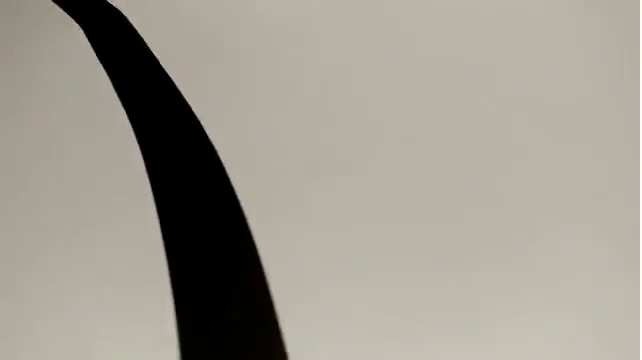

In [0]:
#!wget https://cdn.mos.cms.futurecdn.net/j86BVMguzBFy5fY2wtpngP.jpg
Image("train/linha/image406.png")

In [0]:
!pip install google_images_download

     |████████████████████████████████| 911kB 7.2MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=39ed7e1d06491dec452685bcbd9f9b8a0a3959686c8b79987c2cee5089c983e6
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()

In [0]:
arguments = {"keywords":"random","limit":100,"print_urls":False}
paths = response.download(arguments)
print(paths)

In [0]:
!ls original-images/downloads/arara/

arara  boi  morcego  porco


In [0]:
#!mv downloads original-images
#!mv downloads test
#!mv test/not_line/downloads/random/* test/not_line/
#!cp original-images/downloads/morcego/* test/not_line/
#!rm train/not_line/*
#!cp test/not_line/* train/not_line/
!cp train/linha/* test/linha/

In [0]:
!mkdir test/not_line
!mkdir test/linha

mkdir: cannot create directory ‘test/not_line’: File exists


In [0]:
from os import popen
print(len(popen("ls test/linha/*").read().split()))
print(len(popen("ls train/linha/*").read().split()))
print(len(popen("ls test/not_line/*").read().split()))
print(len(popen("ls train/not_line/*").read().split()))

1435
1435
733
733


---

## Importando bibliotecas e frameworks

In [0]:
from __future__ import print_function, division
import numpy as np
import random
import os
import glob
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
import datetime
import pandas as pd
import time
import h5py
import csv
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle
from PIL import Image, ImageChops, ImageOps
import matplotlib.pyplot as plt
from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


## Criando Modelo

In [0]:
clf = Sequential()
clf.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"))
clf.add(MaxPooling2D(pool_size = (2, 2)))
clf.add(Conv2D(32, (3, 3), activation = 'relu'))
clf.add(MaxPooling2D(pool_size = (2, 2)))
clf.add(Flatten())
clf.add(Dense(activation="relu", units=128))
clf.add(Dense(activation="sigmoid", units=1))
clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Definindo treino e teste

In [120]:
from keras.preprocessing.image import ImageDataGenerator

traino_data_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataset = ImageDataGenerator(rescale = 1./255)

treino_dataset = traino_data_gen.flow_from_directory('./train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_data = test_dataset.flow_from_directory('./test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 1783 images belonging to 2 classes.
Found 1783 images belonging to 2 classes.


## Treinando modelo

In [122]:
  clf.fit_generator(treino_dataset,
                         steps_per_epoch = (100),
                         epochs = 5,
                         validation_data = test_data,
                         validation_steps = 100)

Epoch 1/5
 46/100 [============>.................] - ETA: 27s - loss: 0.0018 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


100/100 [==============================] - 87s 872ms/step - loss: 0.0020 - acc: 0.9997 - val_loss: 2.8540e-04 - val_acc: 1.0000
Epoch 2/5
100/100 [==============================] - 83s 828ms/step - loss: 2.9677e-04 - acc: 1.0000 - val_loss: 8.6679e-05 - val_acc: 1.0000
Epoch 3/5
100/100 [==============================] - 77s 765ms/step - loss: 2.2993e-04 - acc: 1.0000 - val_loss: 8.1457e-05 - val_acc: 1.0000
Epoch 4/5
100/100 [==============================] - 78s 782ms/step - loss: 2.0036e-04 - acc: 1.0000 - val_loss: 6.6707e-05 - val_acc: 1.0000
Epoch 5/5
100/100 [==============================] - 76s 757ms/step - loss: 6.4457e-05 - acc: 1.0000 - val_loss: 2.6474e-05 - val_acc: 1.0000


In [123]:
!ls

11042019-weaner-pigs-in-tents-c-tim-scrivener.jpg  puppy.jpg
609640-gettyimages-802480150.jpg		   test
609640-gettyimages-802480150.jpg.1		   test-old
j86BVMguzBFy5fY2wtpngP.jpg			   test.old.2
linha_model.h5					   train
original-images					   train-old
original-images-old				   train.old.2
puppy-dog.jpg


In [129]:
# serialize model to JSON
model_json = clf.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
clf.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [130]:
!ls

11042019-weaner-pigs-in-tents-c-tim-scrivener.jpg  original-images-old
609640-gettyimages-802480150.jpg		   puppy-dog.jpg
609640-gettyimages-802480150.jpg.1		   puppy.jpg
j86BVMguzBFy5fY2wtpngP.jpg			   test
linha_model_5_epochs.h5				   test-old
linha_model.h5					   test.old.2
model.h5					   train
model.json					   train-old
original-images					   train.old.2


In [0]:
for p in popen("ls test/linha/*.png").read().split("\n"):
  print(p)

test/linha/image1000.png
test/linha/image1001.png
test/linha/image1002.png
test/linha/image1003.png
test/linha/image1004.png
test/linha/image1005.png
test/linha/image1006.png
test/linha/image1007.png
test/linha/image1008.png
test/linha/image1009.png
test/linha/image100.png
test/linha/image1010.png
test/linha/image1011.png
test/linha/image1012.png
test/linha/image1013.png
test/linha/image1014.png
test/linha/image1015.png
test/linha/image1016.png
test/linha/image1017.png
test/linha/image1018.png
test/linha/image1019.png
test/linha/image101.png
test/linha/image1020.png
test/linha/image1021.png
test/linha/image1022.png
test/linha/image1023.png
test/linha/image1024.png
test/linha/image1025.png
test/linha/image1026.png
test/linha/image1027.png
test/linha/image1028.png
test/linha/image1029.png
test/linha/image102.png
test/linha/image1030.png
test/linha/image1031.png
test/linha/image1032.png
test/linha/image1033.png
test/linha/image1034.png
test/linha/image1035.png
test/linha/image1036.png
tes

In [0]:

import numpy as np
from keras.preprocessing import image


In [0]:
dados = popen("ls test/linha/*.png").read().split("\n")
dados1 = popen("ls test/not_line/*.png").read().split("\n")

for p in range(80):
  test_ibage = image.load_img(dados[p], target_size = (64, 64))
  test_ibage = image.img_to_array(test_ibage)
  test_ibage = np.expand_dims(test_ibage, axis = 0)
  result = clf.predict(test_ibage)
  test_ibage1 = image.load_img(dados1[p], target_size = (64, 64))
  test_ibage1 = image.img_to_array(test_ibage1)
  test_ibage1 = np.expand_dims(test_ibage1, axis = 0)
  result1 = clf.predict(test_ibage1)  
  print(p,int(result[0][0]),dados[p],"\t",int(result1[0][0]),dados1[p])

0 0 test/linha/image1000.png 	 1 test/not_line/10.bald-boi-ugly.png
1 0 test/linha/image1001.png 	 1 test/not_line/11.Transparent-OrangeWhiteCat.png
2 0 test/linha/image1002.png 	 1 test/not_line/14.randbitmap-rdo-section.png


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


3 0 test/linha/image1003.png 	 1 test/not_line/15.Feb_2019_blog_rabbit_header.png
4 0 test/linha/image1004.png 	 1 test/not_line/16.vicious_dog_0.png
5 0 test/linha/image1005.png 	 1 test/not_line/17.300px-Dog_morphological_variation.png
6 0 test/linha/image1006.png 	 1 test/not_line/17.random.max-752x423.png
7 0 test/linha/image1007.png 	 1 test/not_line/17.run-run-as-administrator-i%E2%80%99m-fast-as-fuk-boi-61530240.png
8 0 test/linha/image1008.png 	 1 test/not_line/18.porco-1-1140x611.png
9 0 test/linha/image1009.png 	 1 test/not_line/19.fillrandom01.png
10 0 test/linha/image100.png 	 1 test/not_line/1.RandomBitmap.png
11 0 test/linha/image1010.png 	 1 test/not_line/20.darqhlo-ea8b7bf3-a73f-4447-9c96-818f2894d996.png
12 0 test/linha/image1011.png 	 1 test/not_line/21.1497872355.mangoicy_deerdear.png
13 0 test/linha/image1012.png 	 1 test/not_line/21.Scottish-fold.png
14 0 test/linha/image1013.png 	 1 test/not_line/25.2019-06-144-796x423.png
15 0 test/linha/image1014.png 	 1 test/no

#Load Model h5


In [0]:
import numpy as np
from keras.preprocessing import image


In [0]:
!chmod 777 linha_model.h5

In [0]:
from keras.models import load_model

In [128]:
model = load_model('linha_model.h5')

ValueError: ignored

In [0]:


dados = popen("ls test/linha/*.png").read().split("\n")
dados1 = popen("ls test/not_line/*.png").read().split("\n")

for p in range(80):
  test_ibage = image.load_img(dados[p], target_size = (64, 64))
  test_ibage = image.img_to_array(test_ibage)
  test_ibage = np.expand_dims(test_ibage, axis = 0)
  result = model.predict(test_ibage)
  test_ibage1 = image.load_img(dados1[p], target_size = (64, 64))
  test_ibage1 = image.img_to_array(test_ibage1)
  test_ibage1 = np.expand_dims(test_ibage1, axis = 0)
  result1 = model.predict(test_ibage1)  
  print(p,int(result[0][0]),dados[p],"\t",int(result1[0][0]),dados1[p])